In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/MyDrive/WebMining/"


Mounted at /content/drive
BX-Book-Ratings.csv  BX_Books.csv  BX-Users.csv  WebMining.ipynb


In [3]:
%cd /content/drive/MyDrive/WebMining

/content/drive/MyDrive/WebMining


In [47]:
books = pd.read_csv('BX_Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']
users.columns = ['userID', 'Location', 'Age']

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [48]:
users.head(5)

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.000
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.000
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
users.userID.nunique()

278858

**Print total rows of books and unique rows**

In [46]:
print('Total rows: ', len(books))
print('Unique rows based on ISBN: ', len(books.ISBN.unique()))
print('Unique rows based on ISBN: ', len(books.drop_duplicates(['ISBN', 'bookTitle'])))
books.head(5)

Total rows:  271379
Unique rows based on ISBN:  271379
Unique rows based on ISBN:  271379


,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


**Check nr of bookes rated by a user**

In [8]:
ratings[ratings.userID==276747].shape[0]

8

**Rating Distribution** 

In [9]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['userID', 'ISBN', 'bookRating']


In [49]:
print('Unique rows based on ISBN: ', len(ratings.drop_duplicates(['ISBN'])))
print('Unique rows based on userID: ', len(ratings.drop_duplicates(['userID'])))

Unique rows based on ISBN:  340556
Unique rows based on userID:  105283


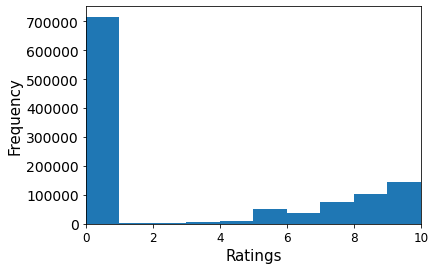

In [50]:
ratings['bookRating'].hist(bins=10, grid=False, xlabelsize=12, ylabelsize=14)
plt.xlabel("Ratings", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.xlim([0,10.0])
plt.show()

In [51]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(ratings['bookRating'].describe())
r_counts = ratings['bookRating'].value_counts()
print(r_counts)

count   1149780.000
mean          2.867
std           3.854
min           0.000
25%           0.000
50%           0.000
75%           7.000
max          10.000
Name: bookRating, dtype: float64
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: bookRating, dtype: int64


**User distribution based on Age**

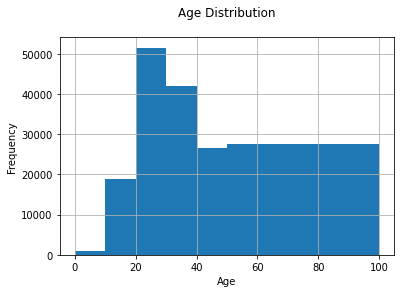

In [52]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Exclude books with less than 50 rartings and users with less than 100 ratings**





In [164]:
u_count = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(u_count[u_count >= 100].index)]
b_count = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(b_count[b_count >= 50].index)]


In [165]:
u_count = ratings['userID'].value_counts()
print(u_count)

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
225595      200
83671       200
252827      200
36554       200
99955       200
Name: userID, Length: 905, dtype: int64


In [166]:
ratings1 = ratings.groupby('userID').filter(lambda x: len(x) >= 0)
print(len(ratings.groupby(['userID']).size()))
book_rating = ratings1.ISBN.unique().tolist()
book_filter = books[books.ISBN.isin(book_rating)]
print(len(book_filter))
#print('Preserved rate of the books : {0:.2f} %'.format(len(ratings1.ISBN.unique())/len(book_filter.ISBN.unique()) * 100))
print('Preserved rate of the users : {0:.2f} %'.format(len(ratings1.userID.unique())/len(ratings.userID.unique()) * 100))

905
178382
Preserved rate of the users : 100.00 %


In [167]:
print(ratings1.shape)

(527556, 3)


**`**Merge rating table with book table to find popular books **`**

In [168]:
book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
book_rating = book_rating.drop(columns, axis=1)
book_rating.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner


**Caculate Toatal Rating Count**

In [169]:
total_rating = (book_rating.groupby(by = ['bookTitle'])['bookRating'].count().
     reset_index().
     rename(columns = {'bookRating': 'totalRating'})
     [['bookTitle', 'totalRating']]
    )
total_rating.head()

,bookTitle,totalRating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1



```

**Merge the totalRating column**

In [175]:
rating_totCount = book_rating.merge(total_rating, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_totCount.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,totalRating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82


In [176]:
print('Total rows: ', len(rating_totCount))
print(rating_totCount['totalRating'].describe())

Total rows:  488756
count   488756.000
mean        21.173
std         37.189
min          1.000
25%          2.000
50%          6.000
75%         22.000
max        365.000
Name: totalRating, dtype: float64


**Limit data set to books that received 50 or more ratings**

In [177]:
rating_totCount2 = rating_totCount.query('totalRating >= 50')
rating_totCount2.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,totalRating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82


In [178]:
print('Total rows: ', len(rating_totCount2))

Total rows:  62149


In [179]:
rating_totCount2= rating_totCount2.drop_duplicates(['userID', 'bookTitle'])

In [180]:
print('Total rows: ', len(rating_totCount2))

Total rows:  60141


In [181]:
columns = ['bookTitle', 'bookAuthor', 'totalRating']
rating_t2 = rating_totCount2.drop(columns, axis=1)
rating_t2.head()

,userID,ISBN,bookRating
0,277427,002542730X,10
1,3363,002542730X,0
2,11676,002542730X,6
3,12538,002542730X,10
4,13552,002542730X,0


**MODEL BASED RS**

In [182]:
# Map books to ISBN:
Mapping_file = dict(zip(book_filter.bookTitle.tolist(), books.ISBN.tolist()))

In [183]:
print('Total rows: ', len(rating_t2))
rating_t2.head(3)
Mapping_file

Total rows:  60141


{'Clara Callan': '0195153448',
 'Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It': '0002005018',
 "The Kitchen God's Wife": '0330022555',
 "What If?: The World's Foremost Military Historians Imagine What Might Have Been": '0374157065',
 'PLEADING GUILTY': '0393045218',
 'Nights Below Station Street': '0399135782',
 "A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series)": '0373711719',
 'The Testament': '0670872695',
 'Beloved (Plume Contemporary Fiction)': '0679425608',
 "Our Dumb Century: The Onion Presents 100 Years of Headlines from America's Finest News Source": '074322678X',
 'New Vegetarian: Bold and Beautiful Recipes for Every Occasion': '0771074670',
 'Mary-Kate & Ashley Switching Goals (Mary-Kate and Ashley Starring in)': '080652121X',
 "Tell Me This Isn't Happening": '0887841740',
 'Wild Animus': '1552041778',
 'Airframe': '0533124409',
 'Timeline': '0864421117',
 'OUT OF THE SILENT PLANET': '037311827

In [155]:
!pip install scikit-surprise

In [184]:
rating_t2.head(5)

,userID,ISBN,bookRating
0,277427,002542730X,10
1,3363,002542730X,0
2,11676,002542730X,6
3,12538,002542730X,10
4,13552,002542730X,0


Cross Validation

In [185]:
from sklearn.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise import Dataset, Reader, SVD, accuracy
reader = Reader(rating_scale=(0, 10))
trainset, testset = train_test_split(rating_t2[['userID','ISBN','bookRating']], test_size=0.25, random_state=0)
trainset.index = range(len(trainset))
testset.index = range(len(testset)) 
trainset = Dataset.load_from_df(trainset, reader)
data = Dataset.load_from_df(rating_t2[['userID','ISBN','bookRating']], reader)

testset = testset.values.tolist()
benchmark = []
i = 0
alg_list = ['SVD(n_factors=50)', 'SVD(n_factors=100)', 
            'SVD(n_factors=150)']
for algorithm in [SVD(n_factors=50), SVD(n_factors=100), SVD(n_factors=150)]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE','MAE'], cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([alg_list[i]], index=['Algorithm']))
    benchmark.append(tmp)
    i+=1
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
SVD(n_factors=150),3.379,2.514,4.879,0.182
SVD(n_factors=100),3.418,2.523,4.063,0.147
SVD(n_factors=50),3.467,2.521,2.268,0.137


Train SVD on tran set and evaluate on test set

In [186]:
trainset = trainset.build_full_trainset()
algorithm = SVD(n_factors=150)
model_svd = algorithm.fit(trainset)
predictions = model_svd.test(testset)

In [187]:
predictions[:3]

[Prediction(uid=194600, iid='0804111359', r_ui=0, est=1.2276647963385057, details={'was_impossible': False}),
 Prediction(uid=60244, iid='0140244824', r_ui=0, est=0, details={'was_impossible': False}),
 Prediction(uid=125039, iid='0425147622', r_ui=0, est=1.0491960543573948, details={'was_impossible': False})]

In [188]:
from collections import Counter
df_pred = pd.DataFrame(predictions, columns=['userID', 'ISBN', 'bookRating', 'pred_rating', 'details'])
df_pred.head(5)

,userID,ISBN,bookRating,pred_rating,details
0,194600,0804111359,0,1.228,{'was_impossible': False}
1,60244,0140244824,0,0.000,{'was_impossible': False}
2,125039,0425147622,0,1.049,{'was_impossible': False}
3,13273,0312201656,0,0.831,{'was_impossible': False}
4,78783,0451186923,0,0.000,{'was_impossible': False}


RMSE and MAE

In [189]:
print(accuracy.rmse(predictions))
print(accuracy.mae(predictions))

RMSE: 3.3767
3.3767150387660902
MAE:  2.5065
2.506450795273205


RECOMMEND BOOKS for USERS

In [197]:
def pred_user_rating(userID, num_recommend):
    if userID in rating_t2.userID.unique():
        ui_list = rating_t2[rating_t2.userID == userID].ISBN.tolist()
        d = {k: v for k,v in Mapping_file.items() if not v in ui_list}        
        predictedL = []
        for i, j in d.items():     
            predicted = algorithm.predict(userID, j)
            predictedL.append((i, predicted[3])) 
        pdf = pd.DataFrame(predictedL, columns = ['books', 'ratings'])
        pdf.sort_values('ratings', ascending=False, inplace=True)  
        pdf.set_index('books', inplace=True)    
        return pdf.head(num_recommend)        
    else:
        print("User Id does not exist in the list!")
        return None

In [198]:
user_id = int(input("Enter the user id to whom you want to recommend : "))
num_recommend = int(input("Enter the number of books you want to recommend : "))
pred_user_rating(user_id, num_recommend)

Enter the user id to whom you want to recommend : 85526
Enter the number of books you want to recommend : 5


,ratings
books,
Les Belles-Soeurs,7.789
Tree by Leaf,7.429
The Etruscan Chimera (Archaeological Mystery),7.346
The Future Scrolls,6.858
Blow Fly: A Scarpetta Novel,6.568


??????????????????

**MEMORY BASED RS**

**Create user-item matrix**

In [ ]:
ratings_t = rating_totCount2.pivot(index = 'ISBN', columns ='userID', values = 'bookRating').fillna(0)
ratings_t.head(5)

userID,183,243,254,507,626,638,643,741,882,929,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
ISBN,,,,,,,,,,,,,,,,,,,,,
0001047973,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0001382608,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0002558122,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0006177379,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
000649840X,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
def create_pivot_table(pd_df):
    data = pd_df.values
    print(data.shape)
    rows, row_pos = np.unique(data[:, 0], return_inverse=True)
    cols, col_pos = np.unique(data[:, 1], return_inverse=True)
    pivot_matrix = np.zeros((len(rows), len(cols)), dtype=data.dtype)
    pivot_matrix[row_pos, col_pos] = data[:, 2]
    print(pivot_matrix.shape)
    return pivot_matrix

In [ ]:
ratings_t = create_pivot_table(rating_totCount2)

(135998, 6)
(3274, 4183)


**Similarity Matrix**

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
# User Similarity Matrix
user_correlation = 1 - pairwise_distances(ratings_t.T, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print('Shape of User Similarity Matrix:', user_correlation.shape)
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(ratings_t, metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print('Shape of Item Similarity Matrix:', item_correlation.shape)

Shape of User Similarity Matrix: (4183, 4183)
Shape of Item Similarity Matrix: (3274, 3274)


In [ ]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        # Use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
        #pred = 0 + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        mean_item_rating = ratings.mean(axis=0)
        ratings_diff = (ratings - mean_item_rating[np.newaxis, :])
        #pred = 0 + ratings_diff.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
        pred = mean_item_rating[np.newaxis, :] + ratings_diff.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    elif type == 'content':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred.clip(min=0)

In [ ]:
user_prediction = predict(ratings_t.T, user_correlation, type='user')
item_prediction = predict(ratings_t.T, item_correlation, type='item')

**Predition of user preference**

In [ ]:
user_pred_df = pd.DataFrame(user_prediction, columns = list(books.ISBN))
item_pred_df = pd.DataFrame(item_prediction, columns = list(books.ISBN))

ValueError: ignored

**Recommend books based on user preference, item-based**

In [ ]:
item_pred_df = pd.DataFrame(item_prediction, columns = list(books.ISBN))

In [ ]:
def recommend_books(pred_df, userID, books, original_ratings, num_recommendations, method_name):
    # Get and sort the user's predictions
    user_row_number = userID - 1 # User ID starts at 1, not 0
    sorted_user_predictions = pred_df.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
    
    # Merge user's data in the books information.
    user_data = original_ratings[original_ratings.userId == (userID)]
    user_full = (user_data.merge(books, how = 'left', left_on = 'ISBN', right_on = 'ISBN').
                     sort_values(['bookRating'], ascending=False)
                 )
    
    # Recommend the highest predicted rating book that the user hasn't read yet.
    recommendations = (books[~books['ISBN'].isin(user_full['ISBN'])].
         merge(pd.DataFrame(sorted_user_predictions).rename_axis('ISBN').reset_index(), how = 'left',
               left_on = 'ISBN',
               right_on = 'ISBN').
         rename(columns = {user_row_number: method_name}).
         sort_values(method_name, ascending = False).
                       iloc[:num_recommendations, :]
                      )

    return user_full, recommendations

In [ ]:
print('Collaborative Filtering RS (item-based)')
user_full, recommendations = recommend_books(item_pred_df, 1, books, location_rating, 10, 'CF_item_pred_rating')
recommendations

KNN

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
rating_totCount2.head()

In [ ]:
from scipy.sparse import csr_matrix
rating_totCount2 = rating_totCount2.drop_duplicates(['userID', 'bookTitle'])
rating_totCount2_pivot = rating_totCount2.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
rating_totCount2_matrix = csr_matrix(rating_totCount2_pivot.values)

In [ ]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=5, n_jobs=-1)
model_knn.fit(rating_totCount2_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1)

In [ ]:
query_index = np.random.choice(rating_totCount2_pivot.shape[0])
distances, indices = model_knn.kneighbors(rating_totCount2_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 5)
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(rating_totCount2_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, rating_totCount2_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Night over Water:

1: The Tenth Justice, with distance of 0.7641593541145015:
2: Red Storm Rising, with distance of 0.7881850271718538:
3: The Road to Omaha, with distance of 0.78950116722051:
4: And Ladies of the Club, with distance of 0.8031127502116326:


**Split data into train and test set**